ER190C: Data, Envinronment and Society.

Lecture 2, Aug 28 2018

In this notebook, we'll do a brief tour of the data set we'll be working with from the California Independent Operator.

In [12]:
import requests # this is a really useful library for pulling data from the web
import csv # this helps us work with csv files
import numpy as np # numpy is something like a matlab replacement for python.  Numeric and scientific computing.
import pandas as pd # we'll learn more about this soon

California ISO is the system operator for the California grid.  They tell generators when and how much to produce.  

They record renewable production data [here](http://content.caiso.com/green/renewrpt/)

That page links to files giving production for the *day* in question.  

Let's look at Aug 21, 2017, the day of a large total solar eclipse.

In [13]:
# figure out what the url should be and enter it here:
url = 'http://content.caiso.com/green/renewrpt/20170821_DailyRenewablesWatch.txt' # do this in lecture

Let's "tab into" `requests` to see how we can get data from the url.

Some cool 'help' features of Jupyter
1. pushing tab at the right time shows you what methods are available to apply to an object.
2. pushing shift-tab repeatedly gives you help files 
3. typing a question mark before a command pulls up the full help file.  

In [14]:
caiso_data = requests.get(url) # do this in lecture

In [15]:
?requests.get # do this in lecture

In [16]:
# let's see what we got
caiso_data

<Response [200]>

'Response' is the object returned by requests.  In this case we've opened a connection to the url but we haven't actually grabbed the text.  

Let's look at the requests documentation to figure out what to do.  (Search for python requests in your favorite search engine and see what you find.)

Looks like we can tack .text on the end of the object to actually pull the data.

In [17]:
caiso_data.text # do this in lecture

'08/21/17\t\t\tHourly Breakdown of Renewable Resources (MW)\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\tHour\t\tGEOTHERMAL\tBIOMASS\t\tBIOGAS\t\tSMALL HYDRO\tWIND TOTAL\tSOLAR PV\tSOLAR THERMAL\t\t\t\t\t\t\r\n\t1\t\t971\t\t245\t\t164\t\t406\t\t2032\t\t0\t\t0\t\t\r\n\t2\t\t971\t\t246\t\t174\t\t408\t\t2056\t\t0\t\t0\t\t\r\n\t3\t\t971\t\t248\t\t175\t\t406\t\t1912\t\t0\t\t0\t\t\r\n\t4\t\t972\t\t250\t\t175\t\t415\t\t1808\t\t0\t\t0\t\t\r\n\t5\t\t972\t\t251\t\t175\t\t405\t\t1771\t\t0\t\t0\t\t\r\n\t6\t\t973\t\t250\t\t175\t\t412\t\t1681\t\t0\t\t0\t\t\r\n\t7\t\t972\t\t254\t\t175\t\t441\t\t1560\t\t174\t\t0\t\t\r\n\t8\t\t971\t\t256\t\t174\t\t442\t\t1559\t\t2376\t\t0\t\t\r\n\t9\t\t969\t\t259\t\t174\t\t495\t\t1582\t\t5484\t\t86\t\t\r\n\t10\t\t965\t\t258\t\t169\t\t463\t\t1534\t\t5312\t\t141\t\t\r\n\t11\t\t945\t\t260\t\t172\t\t451\t\t1372\t\t3503\t\t110\t\t\r\n\t12\t\t939\t\t259\t\t176\t\t457\t\t1297\t\t6329\t\t201\t\t\r\n\t13\t\t936\t\t256\t\t176\t\t460\t\t1308\t\t8700\t\t472\t\t\r\n\t14\t\t936\t\t257\t\t176\t\

Ack!  That's pretty ugly!  What are we looking at?

<br>
<br>
<br>

(a tab delimited file)

I wrote a function that will pull a date range and massage it into the form we want:

In [79]:
import datetime # helps us to work with dates and times in different formats
import os # helps us talk to the operating system command line
from calendar import monthrange

def CAISOrenewables(start_year, start_month, start_day, end_year, end_month, end_day, production = False, matrix = False):
    """Scrape CAISO's daily renewable watch .txt files and 
    convert to a DataFrame or Numpy record array. Will only scrape
    a range of days in a given month.
    
    Keyword arguments:
    Year -- year of the date to scrape
    Month -- Month of date to scrape
    start_day -- starting day of month to scrape
    end_day -- ending day to scrape
    production -- If False, will collect hourly breakdown of renewable resources.
                  If True, will scrape hourly breakdown of total production by resource type.
    matrix -- If False, function will return a Pandas DataFrame
              If True, will return numpy recarray
    """
    base_url = 'http://content.caiso.com/green/renewrpt/'
    tail = '_DailyRenewablesWatch.txt'
    
    rv = pd.DataFrame()
    
    for year in range(start_year, end_year + 1):
        if year == start_year:
            s_month = start_month
        else: 
            s_month = 1
            
        if year == end_year:
            e_month = end_month
        else:
            e_month = 12
            
        for month in range(s_month, e_month + 1):
            if month < 10:
                str_month = '0' + str(month)
            else:
                str_month = str(month)

            if month == start_month and year == start_year:
                s_day = start_day
            else:
                s_day = 1
            if month == end_month and year == end_year:
                e_day = end_day
            else:
                e_day = monthrange(year, month)[1]
            for day in range(s_day, e_day + 1):
                #format date and URL to pull

                if day < 10:
                    str_day = '0'+ str(day)
                else:
                    str_day = str(day)

                str_m_day = str_month + str_day
                url = base_url + str(year) + str_m_day + tail

                #Write scraped file to drive
                caiso_data = requests.get(url).text
                txt_filename = 'CAISOdata/' + str(year) +str_m_day + '.txt'
                csv_filename = 'CAISOdata/' + str(year) + str_m_day + '.csv'

                with open(txt_filename, 'w') as f:
                    f.write(str(caiso_data))

                #Convert the .txt file to a csv.
                with open(txt_filename) as txtfile, open(csv_filename,'w') as new_csv:
                    for line in txtfile: 
                        new_csv.write(line.replace('\t',','))

                #Get day of year for dataframe index
                date = datetime.date(year, month, day)

                #Load data to dataframe.
                data = pd.read_csv(csv_filename, delimiter='\t')

                if not production:
                    data = data.iloc[range(0, 25)]
                else:
                    data = data.iloc[range(28, 53)].reset_index(drop=True)

                #Get column names
                columns = [i for i in np.array2string(data.iloc[0].values).split(',') if len(i)>3]

                #Grab first row of data to put in a dictionary then append the rest.
                first_row = [[int(i)] for i in np.array2string(data.iloc[1].values).split(',') if i.isdigit()]
                df_data = dict(zip(columns, first_row))

                #Do the same for the rest of the rows
                for row in range(2, data.shape[0]):
                    vals = [i for i in np.array2string(data.iloc[row].values).split(',') if i.isdigit()]
                    for item in range(len(columns)):
                        df_data[columns[item]].append(vals[item])
                
                #create DataFrame with collected data
                d_df = pd.DataFrame(df_data, [datetime.datetime(year, month, day, i) for i in range(0,24)])[columns]

                rv = rv.append(d_df)
                
                os.remove(txt_filename)
                os.remove(csv_filename)


    rv.drop('Hour', axis = 1, inplace = True)            
    if matrix:        
        return rv.to_records(index=True)
    
    return rv

Ok, now we can pull whatever data we want for renewables production from the CAISO website.  

Here we'll pull CAISO renewables data for August 20 through 22, 2017.

In [80]:
caiso_data = CAISOrenewables(2017, 8, 29, 2018, 8, 28) # do this in lecture

In [81]:
caiso_data.head()

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
2017-08-29 00:00:00,1181,340,156,324,1551,0,0
2017-08-29 01:00:00,1182,338,156,326,1556,0,0
2017-08-29 02:00:00,1183,337,156,337,1325,0,0
2017-08-29 03:00:00,1185,339,156,313,1158,0,0
2017-08-29 04:00:00,1190,344,156,320,1209,0,0


Now let's use the `.loc` method in pandas to look at an individual data column (more on pandas next time)

In [82]:
import matplotlib.pyplot as plt # this gives us libraries to plot nice figures.

Let's plot the solar generation data using `plt.plot` and the `.loc` method

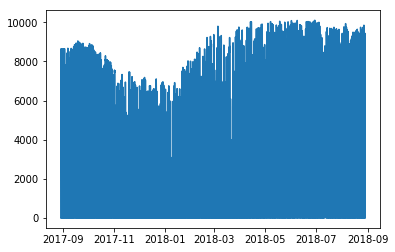

In [83]:
plt.plot(caiso_data.loc[:,'SOLAR PV']) # do this in lecture

In [84]:
caiso_data.to_csv('CAISO_2017to2018.csv')#, index = False, index_label = False)

In [91]:
caiso_data_stack = caiso_data.stack().to_frame()
caiso_data_stack.reset_index(level = 1, inplace=True)  
caiso_data_stack.columns = ['Source', 'MWh']
caiso_data_stack.head()

,Source,MWh
2017-08-29,GEOTHERMAL,1181
2017-08-29,BIOMASS,340
2017-08-29,BIOGAS,156
2017-08-29,SMALL HYDRO,324
2017-08-29,WIND TOTAL,1551


In [92]:
caiso_data_stack.to_csv('CAISO_2017to2018_stack.csv')